# Mohammad Amin Rami

# Student ID: 98101588
## Deep Learning HW2
## Question 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
train_data = pd.read_csv('Data/HW2_data/Q3_train.csv')
test_data = pd.read_csv('Data/HW2_data/Q3_test.csv')

### Part A

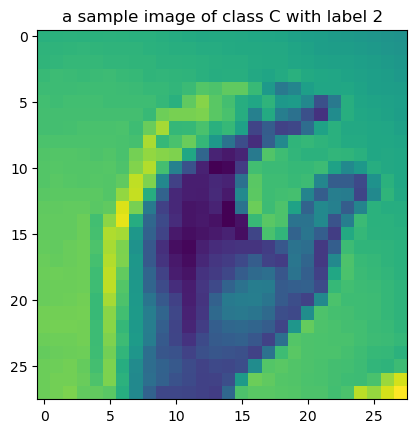

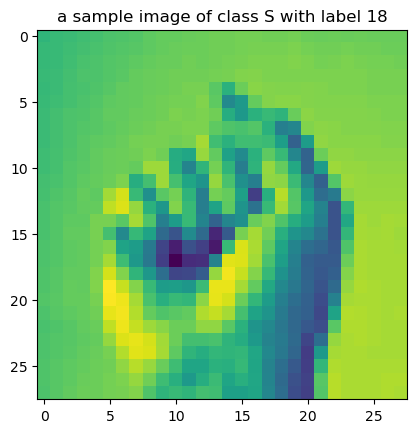

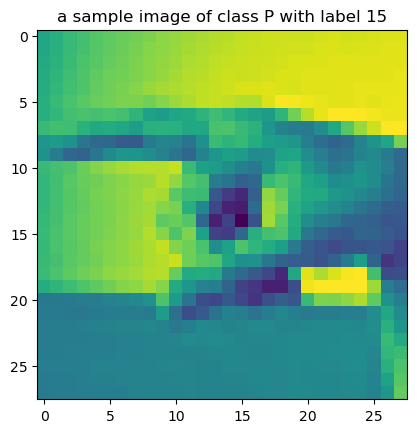

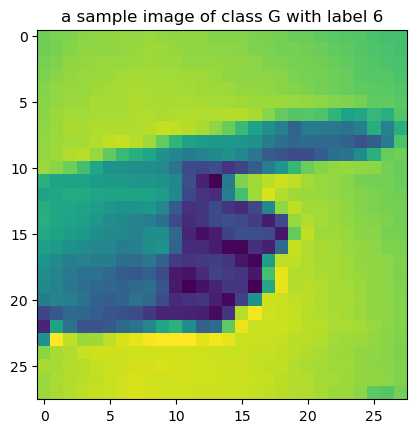

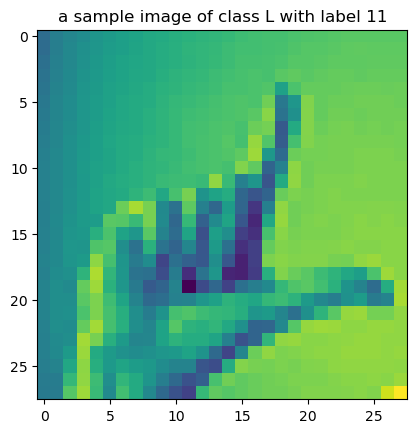

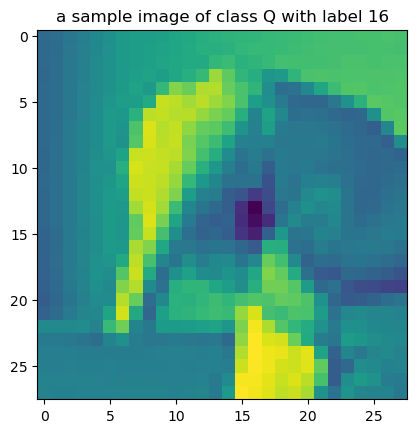

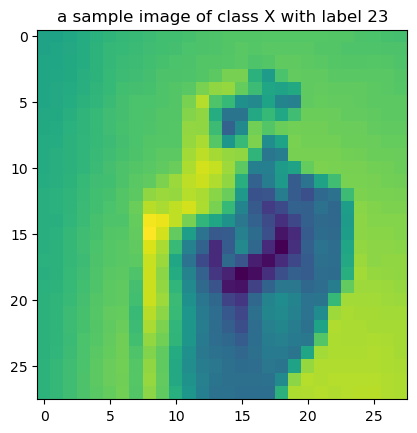

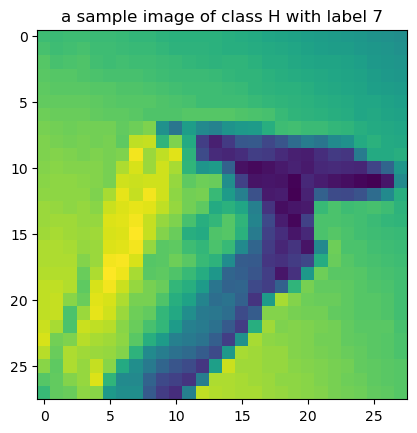

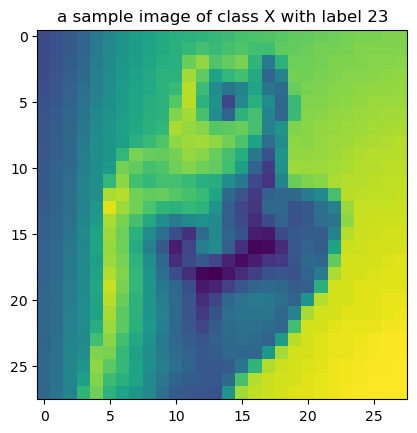

In [3]:
for i in np.random.randint(low=0, high=train_data.shape[0], size=9):
    image = train_data.iloc[i, 1:]
    label = int(train_data.iloc[i, 0])
        
    plt.imshow(np.array(image).reshape((28, 28)))
    plt.title(f'a sample image of class {chr(label+65)} with label {label}')
    plt.show()

### Part B

In [4]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"


class ImageDataSet(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        data = np.array(data)
        self.x = data[:, 1:]
        self.y = data[:, 0]
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        X = self.x[idx, :]
        y = self.y[idx]
        if self.transform is not None:
            X = self.transform(X)
        if self.target_transform is not None:
            y = self.target_transform(y)
        return X, y

In [5]:
training_set = ImageDataSet(
    train_data,
    transform=lambda x: torch.tensor(x).to(device),
    target_transform=lambda y: torch.tensor(y).to(device) 
)
test_set = ImageDataSet(
    test_data,
    transform=lambda x: torch.tensor(x).to(device),
    target_transform=lambda y: torch.tensor(y).to(device) 
)

train_loader = DataLoader(training_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.relu_stack = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 384),
            nn.ReLU(),
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 25)
        )
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu_stack(x)
        x = self.sigmoid(x)
        return x

In [12]:
model1 = NeuralNetwork().to(device)
model1.train()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=384, bias=True)
    (3): ReLU()
    (4): Linear(in_features=384, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=25, bias=True)
  )
  (sigmoid): Sigmoid()
)

In [13]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(torch.float32)
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [14]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(torch.float32)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(dim=1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

### SGD

In [15]:
learning_rate = 1.6e-2
epochs = 30

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

In [16]:
sgd_loss = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loop(train_loader, model1, loss_fn, optimizer)
    epoch_loss = test_loop(test_loader, model1, loss_fn)
    sgd_loss.append(epoch_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 3.235822  [    0/27455]
loss: 3.075361  [ 6400/27455]
loss: 2.801150  [12800/27455]
loss: 2.789733  [19200/27455]
loss: 2.712132  [25600/27455]
Test Error: 
 Accuracy: 24.8%, Avg loss: 2.734364 

Epoch 2
-------------------------------
loss: 2.673633  [    0/27455]
loss: 2.754756  [ 6400/27455]
loss: 2.666245  [12800/27455]
loss: 2.595855  [19200/27455]
loss: 2.575331  [25600/27455]
Test Error: 
 Accuracy: 40.3%, Avg loss: 2.619218 

Epoch 3
-------------------------------
loss: 2.541705  [    0/27455]
loss: 2.729219  [ 6400/27455]
loss: 2.506419  [12800/27455]
loss: 2.495818  [19200/27455]
loss: 2.485834  [25600/27455]
Test Error: 
 Accuracy: 42.4%, Avg loss: 2.549610 

Epoch 4
-------------------------------
loss: 2.531216  [    0/27455]
loss: 2.525804  [ 6400/27455]
loss: 2.475501  [12800/27455]
loss: 2.528221  [19200/27455]
loss: 2.623645  [25600/27455]
Test Error: 
 Accuracy: 46.2%, Avg loss: 2.533749 

Epoch 5
------------------------

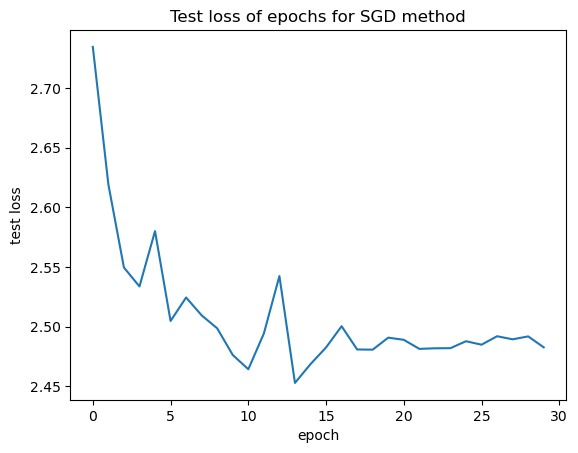

In [18]:
plt.plot(sgd_loss)
plt.title('Test loss of epochs for SGD method')
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.show()

### Adam

In [21]:
model2 = NeuralNetwork().to(device)
model2.train()

learning_rate = 1e-4
epochs = 30

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [22]:
adam_loss = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loop(train_loader, model2, loss_fn, optimizer)
    adam_loss.append(test_loop(test_loader, model2, loss_fn))
print("Done!")

Epoch 1
-------------------------------
loss: 3.233224  [    0/27455]
loss: 2.894901  [ 6400/27455]
loss: 2.738775  [12800/27455]
loss: 2.677603  [19200/27455]
loss: 2.650207  [25600/27455]
Test Error: 
 Accuracy: 33.7%, Avg loss: 2.658694 

Epoch 2
-------------------------------
loss: 2.592872  [    0/27455]
loss: 2.546026  [ 6400/27455]
loss: 2.542274  [12800/27455]
loss: 2.543025  [19200/27455]
loss: 2.469752  [25600/27455]
Test Error: 
 Accuracy: 43.7%, Avg loss: 2.555382 

Epoch 3
-------------------------------
loss: 2.472488  [    0/27455]
loss: 2.471462  [ 6400/27455]
loss: 2.495987  [12800/27455]
loss: 2.416578  [19200/27455]
loss: 2.461724  [25600/27455]
Test Error: 
 Accuracy: 51.8%, Avg loss: 2.527719 

Epoch 4
-------------------------------
loss: 2.432341  [    0/27455]
loss: 2.411988  [ 6400/27455]
loss: 2.468532  [12800/27455]
loss: 2.473957  [19200/27455]
loss: 2.390780  [25600/27455]
Test Error: 
 Accuracy: 57.1%, Avg loss: 2.519733 

Epoch 5
------------------------

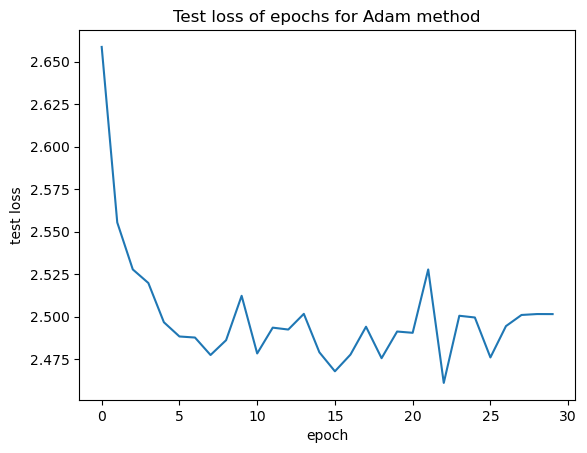

In [23]:
plt.plot(adam_loss)
plt.title('Test loss of epochs for Adam method')
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.show()

#### Difference between SGD and Adam:
In contrast to SGD, Adam dynamocally changes the learning rate and also uses momentum to adjust the weights vector. Typically, Adam converges faster but some experts argue that SGD generalizes better.    
In our problem, both approaches generate similar results. Both methods provide an accuracy of approximately 80%  
So we could say that both work well for our dataset.

### Part C

### Adding Dropout

In [24]:
class NeuralNetworkWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.relu_stack = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 384),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 25)
        )
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu_stack(x)
        x = self.sigmoid(x)
        return x

### SGD

In [25]:
model3 = NeuralNetworkWithDropout().to(device)
model3.train()

NeuralNetworkWithDropout(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=384, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.1, inplace=False)
    (5): Linear(in_features=384, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.1, inplace=False)
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=25, bias=True)
  )
  (sigmoid): Sigmoid()
)

In [26]:
learning_rate = 1e-2
epochs = 30

optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)

In [27]:
sgd_loss = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loop(train_loader, model3, loss_fn, optimizer)
    epoch_loss = test_loop(test_loader, model3, loss_fn)
    sgd_loss.append(epoch_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 3.235629  [    0/27455]
loss: 3.082308  [ 6400/27455]
loss: 2.982591  [12800/27455]
loss: 2.899770  [19200/27455]
loss: 2.766953  [25600/27455]
Test Error: 
 Accuracy: 27.2%, Avg loss: 2.785269 

Epoch 2
-------------------------------
loss: 2.798180  [    0/27455]
loss: 2.783326  [ 6400/27455]
loss: 2.642341  [12800/27455]
loss: 2.606290  [19200/27455]
loss: 2.583073  [25600/27455]
Test Error: 
 Accuracy: 32.9%, Avg loss: 2.696371 

Epoch 3
-------------------------------
loss: 2.679158  [    0/27455]
loss: 2.693239  [ 6400/27455]
loss: 2.605475  [12800/27455]
loss: 2.554560  [19200/27455]
loss: 2.558926  [25600/27455]
Test Error: 
 Accuracy: 37.5%, Avg loss: 2.617659 

Epoch 4
-------------------------------
loss: 2.540718  [    0/27455]
loss: 2.540861  [ 6400/27455]
loss: 2.523395  [12800/27455]
loss: 2.497568  [19200/27455]
loss: 2.625265  [25600/27455]
Test Error: 
 Accuracy: 46.0%, Avg loss: 2.562680 

Epoch 5
------------------------

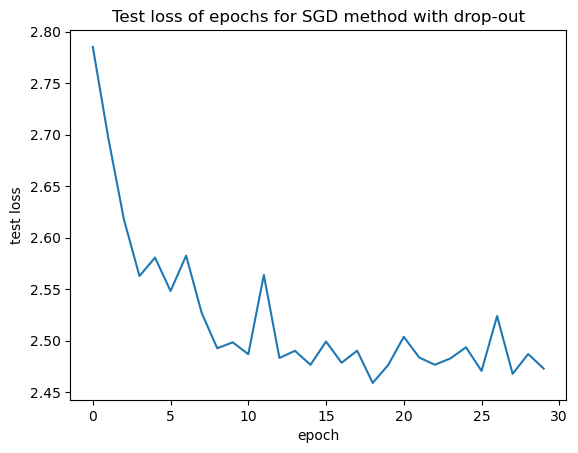

In [28]:
plt.plot(sgd_loss)
plt.title('Test loss of epochs for SGD method with drop-out')
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.show()

### Adam

In [29]:
model4 = NeuralNetworkWithDropout().to(device)
model4.train()

NeuralNetworkWithDropout(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=384, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.1, inplace=False)
    (5): Linear(in_features=384, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.1, inplace=False)
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=25, bias=True)
  )
  (sigmoid): Sigmoid()
)

In [30]:
learning_rate = 1e-4
epochs = 30

optimizer = torch.optim.Adam(model4.parameters(), lr=learning_rate)

In [31]:
adam_loss = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loop(train_loader, model4, loss_fn, optimizer)
    epoch_loss = test_loop(test_loader, model4, loss_fn)
    adam_loss.append(epoch_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 3.281076  [    0/27455]
loss: 2.974934  [ 6400/27455]
loss: 2.793130  [12800/27455]
loss: 2.732241  [19200/27455]
loss: 2.667664  [25600/27455]
Test Error: 
 Accuracy: 28.2%, Avg loss: 2.664645 

Epoch 2
-------------------------------
loss: 2.609132  [    0/27455]
loss: 2.625260  [ 6400/27455]
loss: 2.527945  [12800/27455]
loss: 2.544211  [19200/27455]
loss: 2.562380  [25600/27455]
Test Error: 
 Accuracy: 40.9%, Avg loss: 2.580781 

Epoch 3
-------------------------------
loss: 2.532364  [    0/27455]
loss: 2.481804  [ 6400/27455]
loss: 2.494195  [12800/27455]
loss: 2.468220  [19200/27455]
loss: 2.513077  [25600/27455]
Test Error: 
 Accuracy: 46.6%, Avg loss: 2.527787 

Epoch 4
-------------------------------
loss: 2.423998  [    0/27455]
loss: 2.449411  [ 6400/27455]
loss: 2.431547  [12800/27455]
loss: 2.421819  [19200/27455]
loss: 2.415183  [25600/27455]
Test Error: 
 Accuracy: 52.2%, Avg loss: 2.506306 

Epoch 5
------------------------

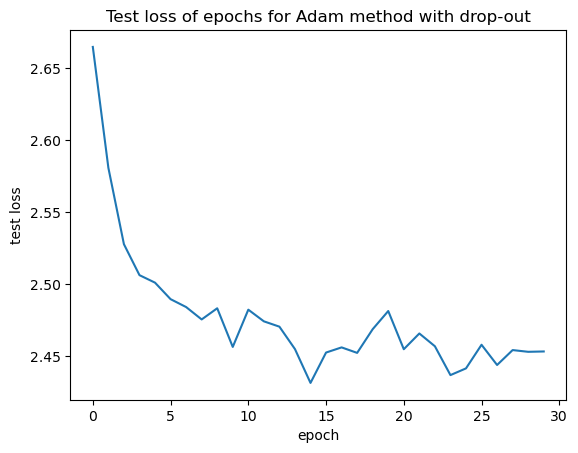

In [32]:
plt.plot(adam_loss)
plt.title('Test loss of epochs for Adam method with drop-out')
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.show()

#### Effect of dropout
As it can be seen, dropout has not improved our model's performance very much. Because dropout is used to prevent overfitting. In our case, our model has not overfitted the data so using dropout might not be very meaningful.   

### Part D

#### Final Results

The best accuracy belongs to our network with SGD optimizer and no dropout     
Achieved accuracy: 84%